## Lead Scoring Case Study

Building a Logistic Regression model to assign a lead score between 0 to 100 to each leads which can be used by the Company to target potential leads. A higher score would mean that the lead is hot, i.e. us most likely to convert whereas a lower score would mean the lead is cold and will mostly not get converted.

### Step 1: Importing Libraries and Reading Data

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Importing Dataset
Lead_Scoring = pd.read_csv('Leads.csv')
Lead_Scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Understanding Data

In [3]:
#Let's Check row and columns in Dataframe
Lead_Scoring.shape

(9240, 37)

Dataset is having 9240 Rows and 37 Columns

In [4]:
#Let's see type of each column
Lead_Scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

From above info we can see that there are 7 numerical columns and 30 categorical columns

In [5]:
# Let's look at the statistical aspects of data frame
Lead_Scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3 : Data Cleaning and Transformation

In [6]:
#Dropping columns which are no longer usesful in dataset like 'Prospect ID','Lead Number', 'Country','I agree to pay the amount through cheque' and 'a free copy of Mstering The Interview'

Lead_Scoring = Lead_Scoring.drop(['Prospect ID','Lead Number', 'Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview'], 1)

In [7]:
Lead_Scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,Modified


As we can see in the dataset there are some columns as 'Select' which means customer has not selected any options hence convert these values as null

In [8]:
Lead_Scoring=Lead_Scoring.replace('Select', np.nan)

In [9]:
Lead_Scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,Modified


Now the Select values has been replaced by NaN

In [10]:
# Checking for missing values
round(Lead_Scoring.isnull().sum()/len(Lead_Scoring)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

As we can see percentage of columns shows some of columns having more than 30% of missing values, so it is better we drop these columns

In [11]:
# Dropping columns having more that 30% of missing values
Lead_Scoring=Lead_Scoring.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','City','Lead Profile','Lead Quality','Tags','How did you hear about X Education','Specialization'],axis=1)

In [12]:
#Re Checking for missing Values
round(Lead_Scoring.isnull().sum()/len(Lead_Scoring)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

As you can see we have dropped columns having more than 30% of missing values.
Now lets impute maximum number of occurences for a particular column where missing values are found below 30%.

In [13]:
#Lead Source Column
Lead_Scoring['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

In [14]:
#TotalVisits Column
Lead_Scoring['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [15]:
#Page Views Per Visit Column
Lead_Scoring['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [16]:
#Last Activity Column
Lead_Scoring['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [17]:
#What is your current occupation Column
Lead_Scoring['What is your current occupation'].value_counts().head()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [18]:
#What matters most to you in choosing a course Column
Lead_Scoring['What matters most to you in choosing a course'].value_counts().head()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
# Imputing the highest number of occurences for each categories into its missing values
missing = {'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened','What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}
Lead_Scoring = Lead_Scoring.fillna(value=missing)

In [20]:
Lead_Scoring.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [21]:
Lead_Scoring['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

As you can see from above Column 'Lead Source' has same variable Google but in different format

In [22]:
# Changing format of google to Google using capitalize
Lead_Scoring['Lead Source'] = Lead_Scoring['Lead Source'].apply(lambda x:x.capitalize())
Lead_Scoring['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Press_release           2
Live chat               2
Blog                    1
Pay per click ads       1
Welearnblog_home        1
Testone                 1
Welearn                 1
Nc_edm                  1
Youtubechannel          1
Name: Lead Source, dtype: int64

Assiging Numerical variables to categories with 'Yes' to 1 nd 'No' to 0

In [23]:
#Creating dictionary for Yes and No
category={"No":0,"Yes":1}

#Column 'Do Not Email'
Lead_Scoring['Do Not Email']=Lead_Scoring['Do Not Email'].map(category)

#Column 'Do Not Call'
Lead_Scoring['Do Not Call']=Lead_Scoring['Do Not Call'].map(category)

#Column 'Search'
Lead_Scoring['Search']=Lead_Scoring['Search'].map(category)

#Column 'Magazine'
Lead_Scoring['Magazine']=Lead_Scoring['Magazine'].map(category)

#Column 'Newspaper Article'
Lead_Scoring['Newspaper Article']=Lead_Scoring['Newspaper Article'].map(category)

#Column 'X Education Forums'
Lead_Scoring['X Education Forums']=Lead_Scoring['X Education Forums'].map(category)

#Column 'Newspaper'
Lead_Scoring['Newspaper']=Lead_Scoring['Newspaper'].map(category)

#Column 'Digital Advertisement'
Lead_Scoring['Digital Advertisement']=Lead_Scoring['Digital Advertisement'].map(category)

#Column 'Through Recommendations'
Lead_Scoring['Through Recommendations']=Lead_Scoring['Through Recommendations'].map(category)

#Column 'Receive More Updates About out Courses'
Lead_Scoring['Receive More Updates About Our Courses']=Lead_Scoring['Receive More Updates About Our Courses'].map(category)

#Column 'Update me on Supply Chain Content'
Lead_Scoring['Update me on Supply Chain Content']=Lead_Scoring['Update me on Supply Chain Content'].map(category)

#Column 'Get updates on DM Content'
Lead_Scoring['Get updates on DM Content']=Lead_Scoring['Get updates on DM Content'].map(category)

In [24]:
Lead_Scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark chat,0,0,0,0,0,0,Page Visited on Website,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic search,0,0,0,5,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct traffic,0,0,1,2,1532,2,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,Email Opened
3,Landing Page Submission,Direct traffic,0,0,0,1,305,1,Unreachable,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified


Now we will be creating Dummy Variables for Categorical Variables

In [25]:
Lead_Scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null object
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null object
Last Activity                                    9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240 non-null int64
Magazine                                         9240 non-

As you can see from above there are 8 categorical variables, we will be creating Dummies for these categorical variables

In [26]:
#Creating a new Dataset with dummy variables
dummy = pd.get_dummies(Lead_Scoring[['Lead Origin','Lead Source','Last Activity', 'What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)
#Adding this dataset to our original dataset
Lead_Scoring = pd.concat([Lead_Scoring,dummy],axis=1)
Lead_Scoring.shape

(9240, 83)

In [27]:
#Removing Original columns for above created dummies
Lead_Scoring=Lead_Scoring.drop(['Lead Origin','Lead Source','Last Activity', 'What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'],axis=1)
Lead_Scoring.shape

(9240, 77)

In [28]:
#Dropping Redundant variables
Lead_Scoring=Lead_Scoring.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine'], axis=1)
Lead_Scoring.shape

(9240, 73)

In [29]:
# Converting categorical variables to numerical variables which are showing as 'Object' data type
Lead_Scoring[['TotalVisits','Page Views Per Visit']]=Lead_Scoring[['TotalVisits','Page Views Per Visit']].astype(float)
Lead_Scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
Do Not Email                                                               9240 non-null int64
Do Not Call                                                                9240 non-null int64
Converted                                                                  9240 non-null int64
TotalVisits                                                                9240 non-null float64
Total Time Spent on Website                                                9240 non-null int64
Page Views Per Visit                                                       9240 non-null float64
Search                                                                     9240 non-null int64
Newspaper Article                                                          9240 non-null int64
X Education Forums                                                         9240 non-null int64
Newspaper                         

Now we can see that all variables are converted to numeric types

### Step 4: Checking for Outliers

In [30]:
Lead_Scoring.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,1.000000,0.000000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


As you can see from above there are outliers for 'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit'

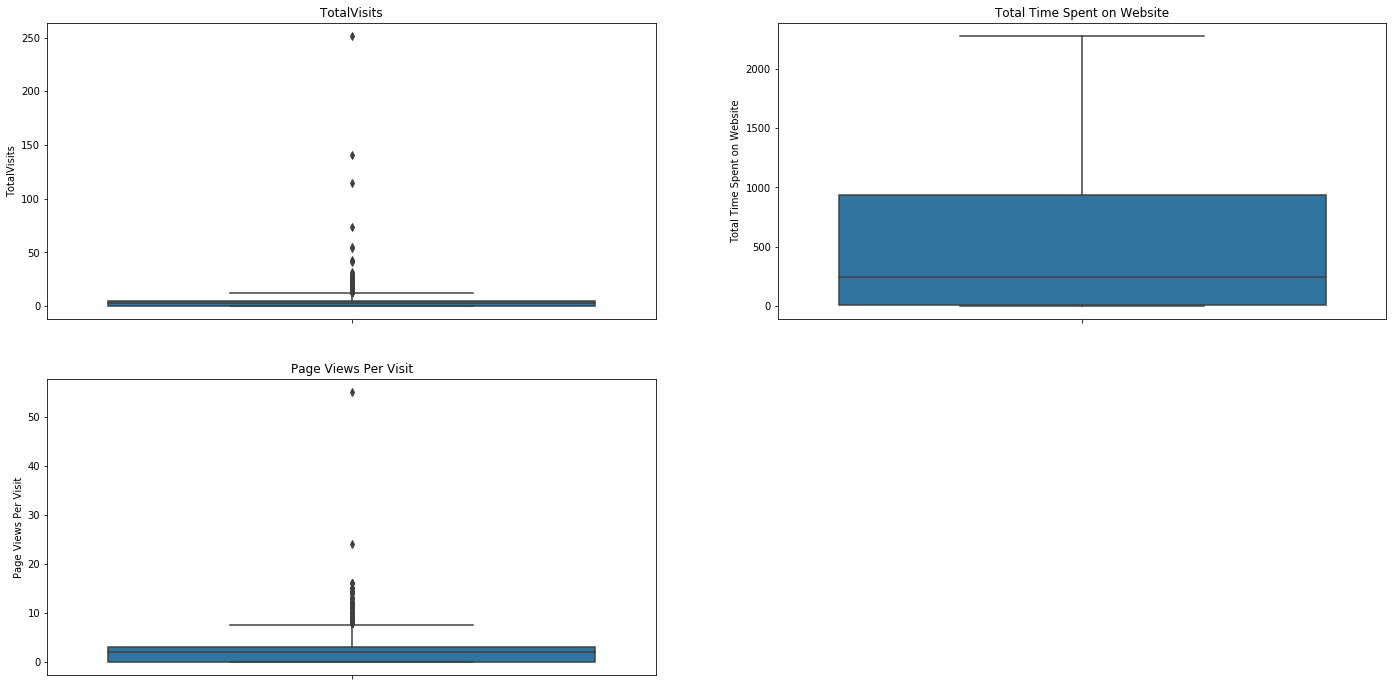

In [31]:
# Plotting Box Plot to understand the outliers
plt.figure(figsize=(24,12))
plt.subplot(2,2,1)
plt.title('TotalVisits')
sns.boxplot(x='TotalVisits',data=Lead_Scoring, orient='v')
plt.subplot(2,2,2)
plt.title('Total Time Spent on Website')
sns.boxplot(x='Total Time Spent on Website',data=Lead_Scoring, orient='v')
plt.subplot(2,2,3)
plt.title('Page Views Per Visit')
sns.boxplot(x='Page Views Per Visit',data=Lead_Scoring, orient='v')

As you can see from above plots we can confirm that we have two outlier variables 'TotalVists' and 'Page Views Per Visit'. We will create bins for these outliers as dropping these may result in impact on model

In [32]:
# For 'TotalVisits' Column, As we have range from 0 to 251 we will create bins as below
total_visits = {'TotalVisits_0_50':50,'TotalVisits_50_100':100,'TotalVisits_100_150':150,'TotalVisits_150_200':200,'TotalVisits_200_250':250,'TotalVisits_250_300':300}
#Assiging 1 and 0 to each bins
for i in range(len(list(total_visits.keys()))):
    Lead_Scoring[list(total_visits.keys())[i]]=Lead_Scoring['TotalVisits'].map(lambda x: 1 if (x < list(total_visits.values())[i] and x >= (list(total_visits.values())[i] - 50)) else 0)

In [33]:
# For 'Page Views Per Visit' Column, As we have range from 0 to 55 we will create bins as below
Page_Views_Per_Visit = {'Page Views Per Visit_0_10':10,'Page Views Per Visit_10_20':20,'Page Views Per Visit_20_30':30,'Page Views Per Visit_30_40':40,'Page Views Per Visit_40_50':50,'Page Views Per Visit_50_60':60}
#Assiging 1 and 0 to each bins
for i in range(len(list(Page_Views_Per_Visit.keys()))):
    Lead_Scoring[list(Page_Views_Per_Visit.keys())[i]]=Lead_Scoring['Page Views Per Visit'].map(lambda x: 1 if (x < list(Page_Views_Per_Visit.values())[i] and x >= (list(Page_Views_Per_Visit.values())[i] - 50)) else 0)

In [34]:
# Checking outliers after removing outliers from two variables
Lead_Scoring.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.0,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,...,0.000216,0.0,0.0,0.000108,0.991883,0.999784,0.999892,0.999892,0.999892,0.008117
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,...,0.014711,0.0,0.0,0.010403,0.089732,0.014711,0.010403,0.010403,0.010403,0.089732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#Removing Redundant Columns from Dataset
Lead_Scoring=Lead_Scoring.drop(['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50'], axis=1)
Lead_Scoring.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0


### Step 5:Data Preparation

#### Train - Test Split

In [36]:
# Putting feature variable to X
X = Lead_Scoring.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0


In [37]:
# Putting the target variable to y
y = Lead_Scoring['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [38]:
# Splitting Dataset into train and tes
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [39]:
# Scaling 'Total Time Spent on Website' variables with standard scaler
scaler = StandardScaler()

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0


In [40]:
# Checking convertion rate
convert = (sum(y)/len(y.index))*100
convert

38.53896103896104

There is a convertion rate of 38.5%

### Looking at correlations

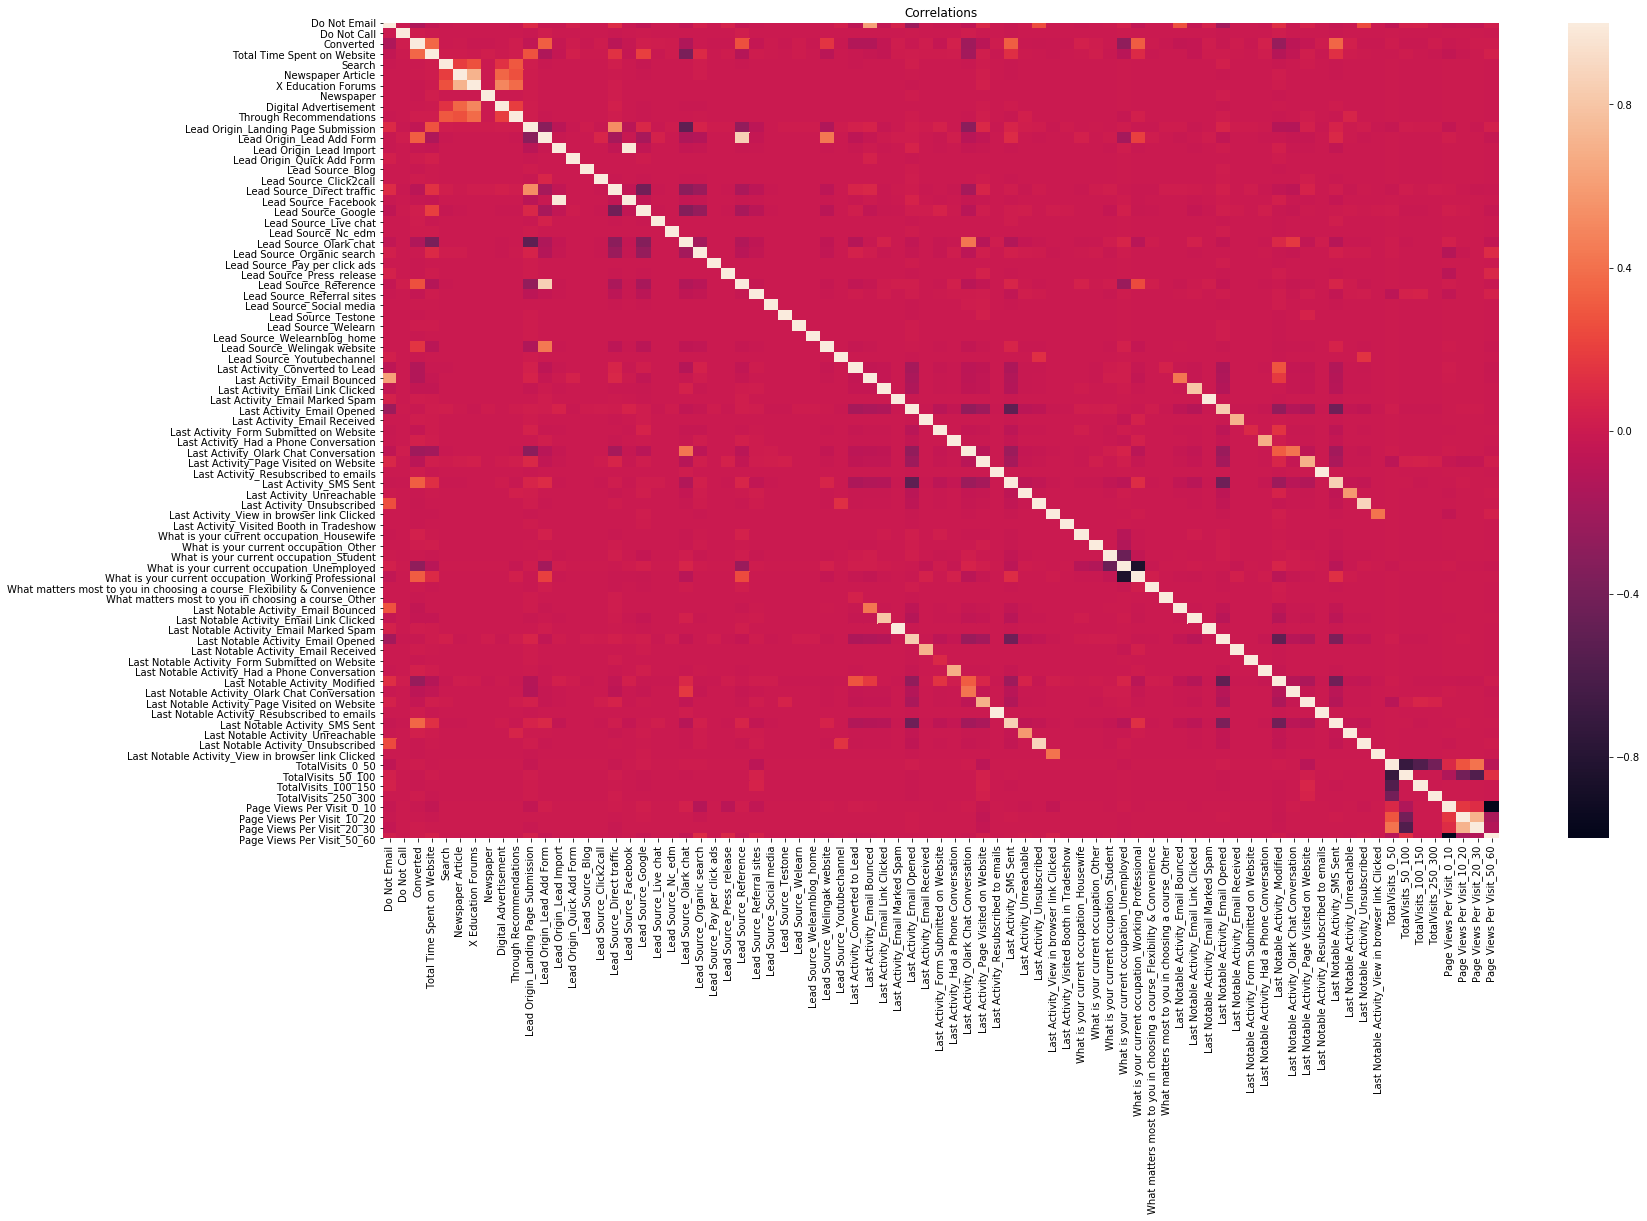

In [41]:
# Let plot correlation matrix
plt.figure(figsize=(25,15))
plt.title('Correlations')
sns.heatmap(Lead_Scoring.corr())
plt.show()

As we can see from above correlation there are two variabled with high correlation we will be dropping these variables

In [42]:
X_train = X_train.drop(['Lead Source_Olark chat','What is your current occupation_Unemployed'], axis=1)
X_test = X_test.drop(['Lead Source_Olark chat','What is your current occupation_Unemployed'], axis=1)

#### Checking again correlation of Dataset

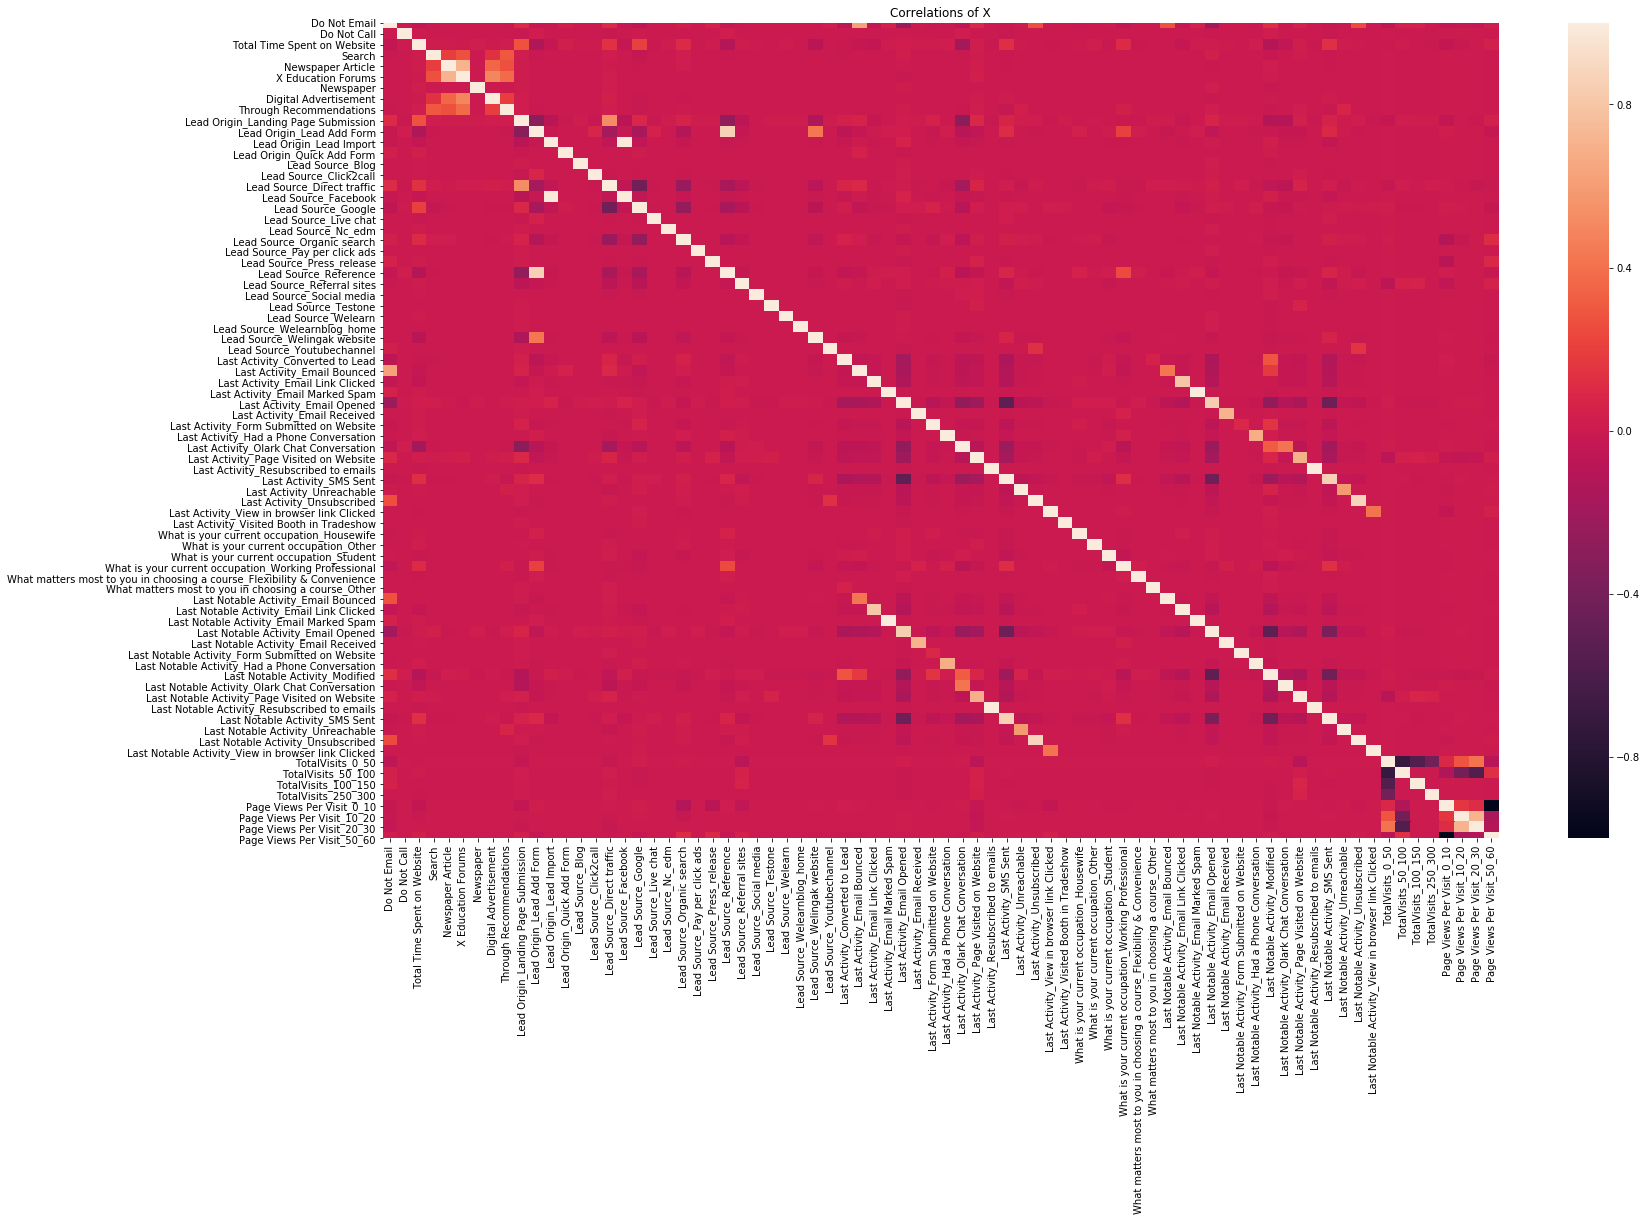

In [43]:
plt.figure(figsize=(25,15))
plt.title('Correlations of X')
sns.heatmap(Lead_Scoring[X_train.columns].corr())
plt.show()

### Step 6 : Model Building

In [44]:
# Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Apr 2021   Deviance:                          nan
Time:                        16:15:11   Pearson chi2:                 6.56e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.353e+15   4.97e+07   8.76e+07      0.000    4.35e+15    4.35e+15
Do Not Email                                                            -7.119e+14   4.45e+06   -1.6e+08      0.000   -7.12e+14   -7.12e+14
Do Not Call                                                              5.367e+14   4.75e+07   1.13e+07      0.000    5.37e+14    5.37e+14
Total Time Spent on Website                                              3.011e+13   9.45e+05   3.19e+07      0.000    3.01e+13    3.01e+13
Search                                                                   1.283e+15    2.2e+07   5.83e+07      0.000    1.28e+15    1.28e+15
Newspaper Article                                                        1.599e+15   6.72e+07   2.38e+07      0.000     1.6e+15     1.6e+15
X Education Forums                                                      -2.448e+15   1.11e+08  -2.21e+07      0.000   -2.45e+15   -2.45e+15
Newspaper                                                               -2.923e+15   6.72e+07  -4.35e+07      0.000   -2.92e+15   -2.92e+15
Digital Advertisement                                                   -2.905e+15   4.75e+07  -6.11e+07      0.000   -2.91e+15   -2.91e+15
Through Recommendations                                                   6.19e+14   2.85e+07   2.17e+07      0.000    6.19e+14    6.19e+14
Lead Origin_Landing Page Submission                                       5.08e+13   2.46e+06   2.06e+07      0.000    5.08e+13    5.08e+13
Lead Origin_Lead Add Form                                                3.495e+13   1.29e+07    2.7e+06      0.000     3.5e+13     3.5e+13
Lead Origin_Lead Import                                                  8.904e+14    4.8e+07   1.86e+07      0.000     8.9e+14     8.9e+14
Lead Origin_Quick Add Form                                               6.818e+15   6.74e+07   1.01e+08      0.000    6.82e+15    6.82e+15
Lead Source_Blog                                                        -1.288e+15   6.72e+07  -1.92e+07      0.000   -1.29e+15   -1.29e+15
Lead Source_Click2call                                                   1.002e+15   4.09e+07   2.45e+07      0.000       1e+15       1e+15
Lead Source_Direct traffic                                               3.314e+14   3.64e+06   9.11e+07      0.000    3.31e+14    3.31e+14
Lead Source_Facebook                                                    -4.686e+14    4.8e+07  -9.76e+06      0.000   -4.69e+14   -4.69e+14
Lead Source_Google                                                       4.505e+14   3.09e+06   1.46e+08      0.000    4.51e+14    4.51e+14
Lea

### Feature Selection using RFE

In [45]:
logreg = LogisticRegression()

In [46]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [47]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False])

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 25),
 ('Newspaper Article', False, 17),
 ('X Education Forums', False, 45),
 ('Newspaper', False, 9),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 27),
 ('Lead Origin_Landing Page Submission', False, 44),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Blog', False, 14),
 ('Lead Source_Click2call', False, 24),
 ('Lead Source_Direct traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live chat', False, 52),
 ('Lead Source_Nc_edm', False, 33),
 ('Lead Source_Organic search', False, 4),
 ('Lead Source_Pay per click ads', False, 35),
 ('Lead Source_Press_release', False, 30),
 ('Lead Source_Reference', False, 55),
 ('Lead Source_Referral sites', False, 2),
 ('Lead Source_Social media', False, 18),
 

In [49]:
col = X_train.columns[rfe.support_]

In [50]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Blog',
       'Lead Source_Click2call', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Live chat', 'Lead Source_Nc_edm',
       'Lead Source_Organic search', 'Lead Source_Pay per click ads',
       'Lead Source_Press_release', 'Lead Source_Reference',
       'Lead Source_Referral sites', 'Lead Source_Social media',
       'Lead Source_Testone', 'Lead Source_Welearn',
       'Lead Source_Welearnblog_home', 'Lead Source_Youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resub

#### Assesing Model with statsmodel

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.1
Date:                Mon, 12 Apr 2021   Deviance:                       5470.3
Time:                        16:15:17   Pearson chi2:                 7.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0092      0.049    -20.403      0.000      -1.106      -0.912
Do Not Email                                            -1.1230      0.187     -5.991      0.000      -1.490      -0.756
Total Time Spent on Website                              0.9457      0.035     27.097      0.000       0.877       1.014
Lead Origin_Lead Add Form                                3.2085      0.187     17.154      0.000       2.842       3.575
Lead Source_Direct traffic                              -0.5191      0.078     -6.667      0.000      -0.672      -0.366
Lead Source_Welingak website                             1.9153      0.742      2.581      0.010       0.461       3.370
Last Activity_Converted to Lead                         -1.3421      0.212     -6.318      0.000      -1.758      -0.926
Last Activity_Email Bounced                             -1.4355      0.413     -3.475      0.001      -2.245      -0.626
Last Activity_Had a Phone Conversation                   0.3094      0.936      0.331      0.741      -1.524       2.143
Last Activity_Olark Chat Conversation                   -1.0531      0.159     -6.608      0.000      -1.366      -0.741
What is your current occupation_Housewife               22.6772    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_Working Professional     2.7922      0.187     14.900      0.000       2.425       3.160
Last Notable Activity_Email Bounced                      1.7481      0.590      2.964      0.003       0.592       2.904
Last Notable Activity_Had a Phone Conversation           2.9767      1.444      2.061      0.039       0.146       5.807
Last Notable Activity_SMS Sent                           1.4583      0.078     18.626      0.000       1.305       1.612
Last Notable Activity_Unreachable                        1.6190      0.514      3.149      0.002       0.611       2.627
========================================================================================================================
"""

#### Calculating VIF

In [52]:
vif=pd.DataFrame()
vif['features'] = X_train_sm[col].columns
vif['VIF']=[variance_inflation_factor(X_train_sm[col].values,i) for i in range(X_train_sm[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
7,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.00
6,Last Activity_Email Bounced,1.94
0,Do Not Email,1.81
2,Lead Origin_Lead Add Form,1.40
4,Lead Source_Welingak website,1.24
11,Last Notable Activity_Email Bounced,1.21
13,Last Notable Activity_SMS Sent,1.21
3,Lead Source_Direct traffic,1.19
10,What is your current occupation_Working Profes...,1.17


In [53]:
# We will be dropping Column 'What is your current occupation_Housewife' as it has high p value
col1 = col.drop('What is your current occupation_Housewife', 1)


In [54]:
# Recreating a new model
X_train_sm = sm.add_constant(X_train_sm[col1])
logm3 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.4
Date:                Mon, 12 Apr 2021   Deviance:                       5482.8
Time:                        16:15:19   Pearson chi2:                 7.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0025      0.049    -20.311      0.000      -1.099      -0.906
Do Not Email                                            -1.1272      0.187     -6.012      0.000      -1.495      -0.760
Total Time Spent on Website                              0.9459      0.035     27.120      0.000       0.878       1.014
Lead Origin_Lead Add Form                                3.2252      0.187     17.276      0.000       2.859       3.591
Lead Source_Direct traffic                              -0.5200      0.078     -6.687      0.000      -0.672      -0.368
Lead Source_Welingak website                             1.8941      0.742      2.552      0.011       0.440       3.349
Last Activity_Converted to Lead                         -1.3480      0.212     -6.347      0.000      -1.764      -0.932
Last Activity_Email Bounced                             -1.4424      0.414     -3.487      0.000      -2.253      -0.632
Last Activity_Had a Phone Conversation                   0.3014      0.936      0.322      0.747      -1.533       2.136
Last Activity_Olark Chat Conversation                   -1.0597      0.159     -6.650      0.000      -1.372      -0.747
What is your current occupation_Working Professional     2.7878      0.187     14.875      0.000       2.420       3.155
Last Notable Activity_Email Bounced                      1.7531      0.590      2.970      0.003       0.596       2.910
Last Notable Activity_Had a Phone Conversation           2.9783      1.444      2.062      0.039       0.147       5.809
Last Notable Activity_SMS Sent                           1.4519      0.078     18.554      0.000       1.299       1.605
Last Notable Activity_Unreachable                        1.6126      0.514      3.136      0.002       0.605       2.621
========================================================================================================================
"""

In [55]:
# Dropping column 'Last Activity_Had a Phone Conversation' as it has high p value and also constant
col2 = col1.drop('Last Activity_Had a Phone Conversation', 1)

In [56]:
# Recreating Model
X_train_sm = sm.add_constant(X_train_sm[col2])
logm4 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.5
Date:                Mon, 12 Apr 2021   Deviance:                       5483.0
Time:                        16:15:19   Pearson chi2:                 7.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0020      0.049    -20.312      0.000      -1.099      -0.905
Do Not Email                                            -1.1269      0.188     -6.009      0.000      -1.494      -0.759
Total Time Spent on Website                              0.9462      0.035     27.135      0.000       0.878       1.015
Lead Origin_Lead Add Form                                3.2266      0.187     17.287      0.000       2.861       3.592
Lead Source_Direct traffic                              -0.5201      0.078     -6.689      0.000      -0.673      -0.368
Lead Source_Welingak website                             1.8925      0.742      2.550      0.011       0.438       3.347
Last Activity_Converted to Lead                         -1.3487      0.212     -6.350      0.000      -1.765      -0.932
Last Activity_Email Bounced                             -1.4438      0.414     -3.490      0.000      -2.255      -0.633
Last Activity_Olark Chat Conversation                   -1.0602      0.159     -6.653      0.000      -1.373      -0.748
What is your current occupation_Working Professional     2.7892      0.187     14.887      0.000       2.422       3.156
Last Notable Activity_Email Bounced                      1.7535      0.590      2.970      0.003       0.596       2.910
Last Notable Activity_Had a Phone Conversation           3.2793      1.101      2.978      0.003       1.121       5.437
Last Notable Activity_SMS Sent                           1.4514      0.078     18.550      0.000       1.298       1.605
Last Notable Activity_Unreachable                        1.6122      0.514      3.135      0.002       0.604       2.620
========================================================================================================================
"""

In [57]:
# Droping column 'Last Notable Activity_Email Bounced' as it is most insignificant
col3 = col2.drop('Last Notable Activity_Email Bounced', 1)

In [58]:
# Recreating Model
X_train_sm = sm.add_constant(X_train_sm[col3])
logm5 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.6
Date:                Mon, 12 Apr 2021   Deviance:                       5491.1
Time:                        16:15:20   Pearson chi2:                 7.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0008      0.049    -20.297      0.000      -1.097      -0.904
Do Not Email                                            -1.1076      0.187     -5.937      0.000      -1.473      -0.742
Total Time Spent on Website                              0.9456      0.035     27.141      0.000       0.877       1.014
Lead Origin_Lead Add Form                                3.1943      0.185     17.274      0.000       2.832       3.557
Lead Source_Direct traffic                              -0.5218      0.078     -6.712      0.000      -0.674      -0.369
Lead Source_Welingak website                             1.9936      0.747      2.670      0.008       0.530       3.457
Last Activity_Converted to Lead                         -1.3491      0.212     -6.353      0.000      -1.765      -0.933
Last Activity_Email Bounced                             -0.9092      0.338     -2.691      0.007      -1.571      -0.247
Last Activity_Olark Chat Conversation                   -1.0615      0.159     -6.663      0.000      -1.374      -0.749
What is your current occupation_Working Professional     2.7891      0.188     14.870      0.000       2.421       3.157
Last Notable Activity_Had a Phone Conversation           3.2782      1.101      2.977      0.003       1.120       5.436
Last Notable Activity_SMS Sent                           1.4503      0.078     18.547      0.000       1.297       1.604
Last Notable Activity_Unreachable                        1.6109      0.514      3.133      0.002       0.603       2.618
========================================================================================================================
"""

In [59]:
# Droping column 'Last Activity_Email Bounced' as it is most insignificant
col4 = col3.drop('Last Activity_Email Bounced', 1)

In [60]:
# Recreating Model
X_train_sm = sm.add_constant(X_train_sm[col4])
logm6 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.5
Date:                Mon, 12 Apr 2021   Deviance:                       5498.9
Time:                        16:15:20   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0088      0.049    -20.477      0.000      -1.105      -0.912
Do Not Email                                            -1.4008      0.160     -8.740      0.000      -1.715      -1.087
Total Time Spent on Website                              0.9429      0.035     27.095      0.000       0.875       1.011
Lead Origin_Lead Add Form                                3.1879      0.185     17.260      0.000       2.826       3.550
Lead Source_Direct traffic                              -0.5206      0.078     -6.700      0.000      -0.673      -0.368
Lead Source_Welingak website                             1.9924      0.743      2.680      0.007       0.535       3.449
Last Activity_Converted to Lead                         -1.3398      0.212     -6.312      0.000      -1.756      -0.924
Last Activity_Olark Chat Conversation                   -1.0501      0.159     -6.592      0.000      -1.362      -0.738
What is your current occupation_Working Professional     2.7875      0.187     14.900      0.000       2.421       3.154
Last Notable Activity_Had a Phone Conversation           3.2848      1.101      2.984      0.003       1.127       5.443
Last Notable Activity_SMS Sent                           1.4738      0.078     18.917      0.000       1.321       1.627
Last Notable Activity_Unreachable                        1.6261      0.516      3.153      0.002       0.615       2.637
========================================================================================================================
"""

In [61]:
# Checking VIF for new model to be sure
vif=pd.DataFrame()
vif['features'] = X_train_sm[col4].columns
vif['VIF']=[variance_inflation_factor(X_train_sm[col4].values,i) for i in range(X_train_sm[col4].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,Lead Origin_Lead Add Form,1.39
4,Lead Source_Welingak website,1.24
3,Lead Source_Direct traffic,1.19
9,Last Notable Activity_SMS Sent,1.19
7,What is your current occupation_Working Profes...,1.16
1,Total Time Spent on Website,1.10
0,Do Not Email,1.07
6,Last Activity_Olark Chat Conversation,1.04
5,Last Activity_Converted to Lead,1.03
8,Last Notable Activity_Had a Phone Conversation,1.00


#### Predicting a Train Model

In [62]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})
y_train_pred_final.head()

,Converted,Converted_probability,ID
1871,0,0.136629,1871
6795,0,0.178883,6795
3516,0,0.159669,3516
8105,0,0.852245,8105
3934,0,0.136629,3934


### ROC curve plotting

 - ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
 - The curve closer to left side border than right side of the border is more accurate.
 - The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [63]:
def Lead_Scoring_roc(real,probability):
    fpr, tpr, thresholds = roc_curve(real, probability, drop_intermediate = False)
    auc_score = roc_auc_score(real, probability)
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, label='ROC Cure (area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0]) #Setting X axis limit
    plt.ylim([0.0,1.05])#Setting y axis limit
    plt.xlabel('False Positive Rate')#Setting X label
    plt.ylabel('True Positive Rate')#Setting Y label
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

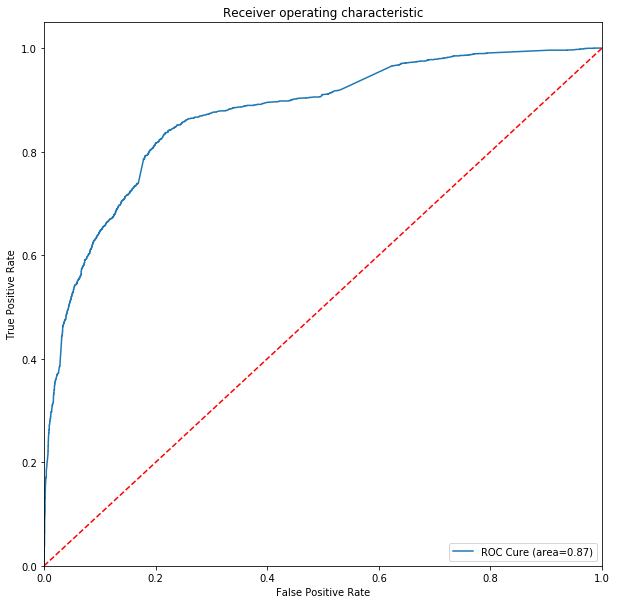

In [64]:
Lead_Scoring_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

As you can see from above curve we can conclude below:
    - Curve is closer to left side of border that right side. So our model is having great accuracy
    - The are under ROC curve is 87% of total area

### Step 7 : Finding Optimal cutoff point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [65]:
# Lets create columns with different probablity cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_probability'].map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.136629,1871,1,1,0,0,0,0,0,0,0,0
6795,0,0.178883,6795,1,1,0,0,0,0,0,0,0,0
3516,0,0.159669,3516,1,1,0,0,0,0,0,0,0,0
8105,0,0.852245,8105,1,1,1,1,1,1,1,1,1,0
3934,0,0.136629,3934,1,1,0,0,0,0,0,0,0,0


In [66]:
# Let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] #true positive
# TN = confusion[0,0] #true negative
# FP = confusion[0,1] #false positive
# FN = confusion[1,0] #false negative

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.561998     0.977697     0.305847
0.2          0.2  0.750618     0.880373     0.670665
0.3          0.3  0.800247     0.841444     0.774863
0.4          0.4  0.807514     0.787510     0.819840
0.5          0.5  0.801330     0.665450     0.885057
0.6          0.6  0.796382     0.581509     0.928786
0.7          0.7  0.785250     0.514599     0.952024
0.8          0.8  0.747835     0.382806     0.972764
0.9          0.9  0.717687     0.276156     0.989755


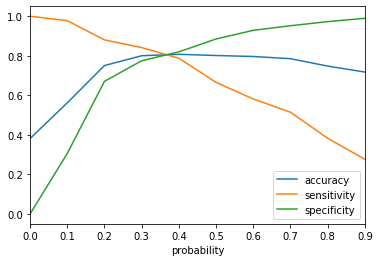

In [67]:
# Plotting accuracy sensitivity and specificity for various probablilities
cutoff.plot.line(x='probability',y=['accuracy','sensitivity','specificity'])
plt.show()

From above plot we can conclue that 0.4 is the optimum point to take is as cutoff probability

In [68]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_probability'].map(lambda x:1 if x>0.4 else 0) #Predicted value
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.136629,1871,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.178883,6795,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.159669,3516,1,1,0,0,0,0,0,0,0,0,0
8105,0,0.852245,8105,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.136629,3934,1,1,0,0,0,0,0,0,0,0,0


In [69]:
# Let's check overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8075139146567718

In [70]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3281  721]
 [ 524 1942]]


In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Calculating Sensitivity
TP/float(TP+FN)

0.7875101378751014

In [73]:
# Calculating Specificity
TN/float(TN+FP)

0.81984007996002

In [74]:
# Calculate false positive rate
FP/float(TN+FP)

0.18015992003998002

In [75]:
# Positive predictive rate
TP/float(TP+FP)

0.7292527224934284

In [76]:
# Negative predictive rate
TN/float(TN+FN)

0.8622864651773982

#### Observation:
After running model on training Data set these are figure we obtained.
- Accuracy : 80.7%
- Sensitiviy : 78.7%
- Specificity : 81.9%

### Step 8: Precision and Recall

In [77]:
# Looking at confusion matrix again
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion1)

[[3281  721]
 [ 524 1942]]


In [78]:
from sklearn.metrics import precision_score, recall_score

In [79]:
Precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
Recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [80]:
print('Precision', Precision)
print('Recall', Recall)

Precision 0.7292527224934284
Recall 0.7875101378751014


- Precision percentage is approximately 73% and Recall percentage is approximately 79%

#### Precision and Recall tradeoff

In [81]:
from sklearn.metrics import precision_recall_curve

In [82]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

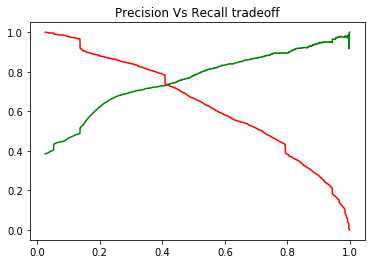

In [83]:
plt.title('Precision Vs Recall tradeoff')
plt.plot(thresholds, p[:-1],"g-")
plt.plot(thresholds, r[:-1],"r-")
plt.show()


### Step 9: Making Predictions on Test set

In [84]:
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [85]:
X_test = X_test[col4]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct traffic,Lead Source_Welingak website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0,0.964504,0,1,0,0,0,0,0,1,0
2376,0,-0.885371,1,0,0,0,0,0,0,1,0
7766,0,-0.777416,0,0,0,0,0,1,0,0,1
9199,0,-0.885371,0,0,0,0,1,0,0,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0


In [86]:
X_test_sm = sm.add_constant(X_test)

In [87]:
y_test_pred = res.predict(X_test_sm)

In [88]:
y_test_pred[:10]

4269    0.701392
2376    0.943652
7766    0.935343
9199    0.052466
4359    0.793208
9186    0.665102
1631    0.476044
8963    0.200815
8007    0.069794
5324    0.476593
dtype: float64

In [89]:
# COnverting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [90]:
y_pred_1.head()

,0
4269,0.701392
2376,0.943652
7766,0.935343
9199,0.052466
4359,0.793208


In [91]:
# COnverting y test to dataframe
y_test_df = pd.DataFrame(y_test)

In [92]:
y_test_df['Lead Number'] = y_test_df.index

In [93]:
# Removing index form both dataframes
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [94]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [95]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.701392
1,1,2376,0.943652
2,1,7766,0.935343
3,0,9199,0.052466
4,1,4359,0.793208


In [96]:
# Renaming Column
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.701392
1,1,2376,0.943652
2,1,7766,0.935343
3,0,9199,0.052466
4,1,4359,0.793208


In [97]:
# Re arranging columns
y_pred_final = y_pred_final[['Lead Number','Converted','Converted_Prob']]


In [98]:
# Lets calculate Lead Score
y_pred_final['Lead Score']=y_pred_final.Converted_Prob.map(lambda x: round(x*100))

In [99]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Lead Score
0,4269,1,0.701392,70
1,2376,1,0.943652,94
2,7766,1,0.935343,94
3,9199,0,0.052466,5
4,4359,1,0.793208,79


In [100]:
y_pred_final['Final_Predicted']=y_pred_final.Converted_Prob.map(lambda x: 1 if x>0.42 else 0)

In [101]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Lead Score,Final_Predicted
0,4269,1,0.701392,70,1
1,2376,1,0.943652,94,1
2,7766,1,0.935343,94,1
3,9199,0,0.052466,5,0
4,4359,1,0.793208,79,1


In [102]:
# Let's check overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7940115440115441

In [103]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2

array([[1424,  253],
       [ 318,  777]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
#Let's see sensitivity of test dataset
TP/float(TP+FN)

0.7095890410958904

In [106]:
#Let's see specificity of test dataset
TN/float(TN+FP)

0.8491353607632678

In [107]:
precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7543689320388349

In [108]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7095890410958904

#### Observation:
After running model on test Data set these are figure we obtained.
- Accuracy : 79.40%
- Sensitiviy : 70.95%
- Specificity : 84.91%
- Precision : 75.43%
- Recall Score : 70.95%

### Conlusion:
After running model on training Data set these are figure we obtained.
- Accuracy : 80.7%
- Sensitiviy : 78.7%
- Specificity : 81.9%
- Precision : 72.92%
- Recall Score : 78.75%


After running model on test Data set these are figure we obtained.
- Accuracy : 79.40%
- Sensitiviy : 70.95%
- Specificity : 84.91%
- Precision : 75.43%
- Recall Score : 70.95%
    